<a href="https://colab.research.google.com/github/Dobarri/DL_CV_study/blob/main/%08w4_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6. convolution 신경망

딥러닝과 컨볼루션 신경망(Convolutional Neural Network:CNN)이 대중화되기 전까지 이미지 데이터는 숫자나 표로 된 데이터에 비해 다루기 어렵다고 여겨짐.

최근 CNN은 이미지뿐 아니라 텍스트나 음성 등 다양한 데이터 처리에 쓰이고 있다.

# 6.1 특징 추출

앞에서 나온 보스턴 주택 가격이나 와인 데이터 셋 에는 데이터의 특징들이 있었다. 하지만 Fashion MNIST같은 이미지 데이터에서는 특징을 직접 찾아야한다. 

- 물체 감지 (object detection)알고리즘: 이미지에서 사물의 외곽선에 해당하는 특징을 발견
- SIFT(Scale-Invariant Feature Transform)알고리즘 : 이미지의 회전과 크기에 대해 변하지 않는 특징 추출해서 두 개의 이미지에서 서로 대응되는 부분 찾음

**컨볼루션 연산(합성곱)** : 특징 추출(Feature Extraction) 기법 중 하나. 각 픽셀을 본래 픽셀과 그 주변 픽셀의 조합으로 대체하는 동작. 연산에 쓰이는 작은 행렬을 **필터(filter)** 또는 **커널(kernel)**이라 함.

→ 원본 이미지의 각 픽셀을 포함한 주변 픽셀과 필터의 모든 픽셀은 각각 곱연산을 하고 그 결과를 모두 합해서 새로운 이미지에 넣어줌

- 수작업으로 설계한 특징(Hand-crafted feature) : 경험직 지식을 통해 직접 손으로 값을 넣어준 필터들.

<문제점>

1. 적용하고자 하는 분야에 대한 전문적 지식 필요
2. 시간, 비용이 많이 듬
3. 한 분야에서 효과적인 특징을 다른 분야에 적용하기 어려움

⇒ 딥러닝 기반의 컨볼루션 연산은 이런 문제점들을 해결(**네트워크가 특징을 추출하는 필터를 자동으로 생성**)

# 6.2 주요 레이어 정리

지금까지 나온 레이어 : Dense(각 뉴런 서로 완전 연결), Flatten(다차원 → 1차원)

- 이미지 분류에 사용되는 일반적인 컨볼루션 신경망 구조 : Feature Extractor  + Classifier


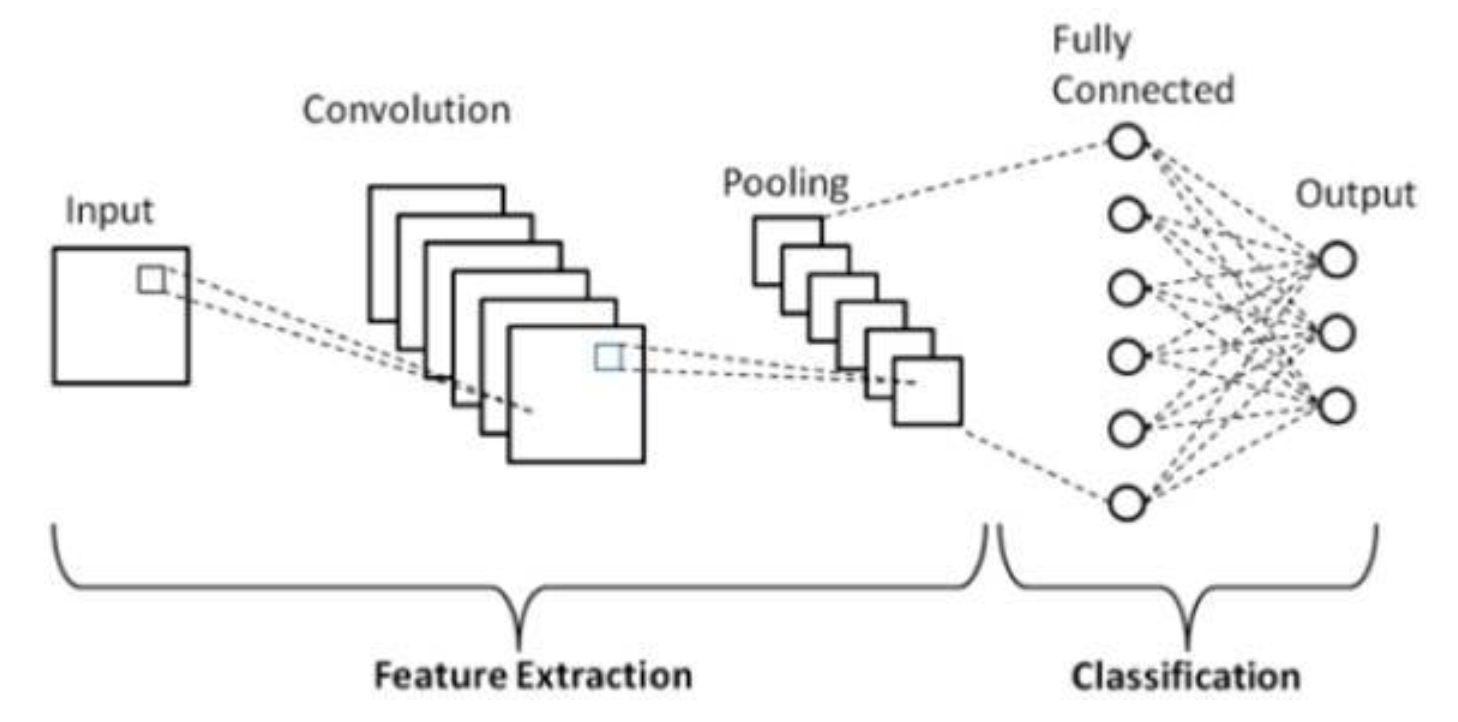


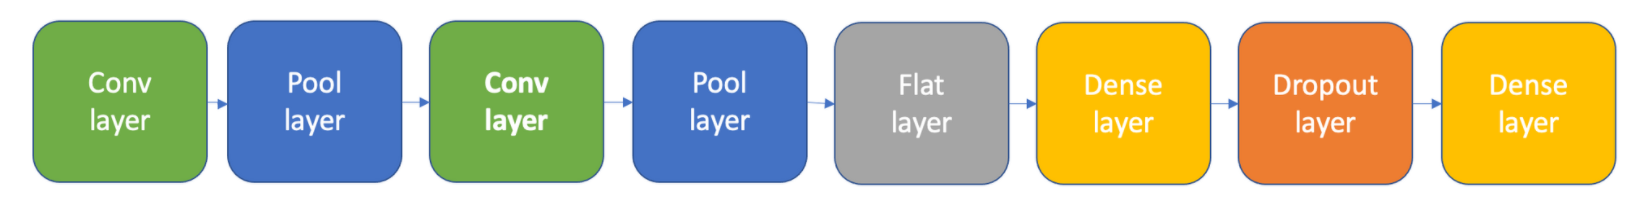

- 특징 추출기에서는 Convolution 레이어, pooling 레이어 교차 배치
- 분류기에는 Dense 레이어 배치, overfitting 막기 위해 Dropout layer 사이에 배치

### 6.2.1 convolution layer

: convoultion 연산을 하는 layer

- 필터는 네트워크의 학습을 통해 자동으로 추출(필터의 갯수 정도만 사용자 지정)

<2차원 기준>

채널(Channel) : 각 이미지가 가진 색상에 대한 정보를 분리해서 담아놓는 공간. R,G,B

convolution layer는 각 channel에 대해 계산된 값을 합쳐 새로운 이미지를 만듬. 

→ (새로운 이미지의 마지막 차원 수 = 필터의 수)

<2차원 이미지를 다루는 컨볼루션 레이어 생성>

In [ ]:
import tensorflow as tf

conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3), strides=(2,2), padding='valid', filters=16)

- kernel_size(높이, 너비) : 필터 행렬의 크기. (=receptive field)
- strides(높이, 너비) : 한 step마다 필터가 이동하는 크기.
- padding : 연산 전 입력 이미지 주변에 빈 값을 넣을지 지정하는 옵션.
    - ‘valid’ : 빈 값을 사용하지 않음
    - ‘same’ : 빈 값을 넣어 출력 이미지의 크기를 입력과 같도록 보존. (0으로 채우는 경우 → zero padding)
- filters : 필터의 갯수. 많을수록 많은 특징 추출하지만 학습 속도 느리고 과적합 가능성
    - 신경망 네트워크 VGG는 네트워크가 깊어질수록 필터 수 2배로 늘려감

**입력 채널 수 = 필터의 채널 수**

**필터의 갯수 = 출력의 채널수**

### 6.2.2 pooling layer

이미지를 구성하는 픽셀 중 인접한 픽셀들은 비슷한 정보를 갖고 있는 경우가 많다. 이런 이미지의 크기를 줄이면서 중요한 정보만 남기기 위해(효율적인 메모리 사용, 과적합 방지) subsampling 기법을 사용하는데 이때 사용되는 레이어가 **pooling layer**이다. Max, Average...

In [ ]:
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))

- pool_size(높이, 너비) : 한 번에 Max 연산을 수행할 범위
- strides(높이, 너비) : 계산 과정에서 한 step마다 이동하는 크기

pooling layer는 가중치가 없기 때문에 학습되지 않으며 생략되기도 함

### 6.2.3 dropout layer

: **학습 과정에서** 무작위로 같은 레이어에 있는 뉴런의 부분집합을 제거.(테스트할 때는 모든 값을 포함해서 계산) → 네트워크의 과적합을 막기 위해 사용

In [ ]:
pool1 = tf.keras.layers.Dropout(rate=0.3)

rate : 제외할 뉴런의 비율

6.3 Fashion MNIST 데이터셋에 적용

In [ ]:
#fashion MNIST 데이터 불러오기
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

train_x = train_x/255
test_x = test_x/255

2D convoultion layer에서 채널 형태의 데이터를 받도록 데이터의 shape 변경

In [ ]:
#데이터 shape 바꾸기

print(train_x.shape, test_x.shape)

train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

print(train_x.shape, test_x.shape)

2차원 그래프로 그리기 위해 reshape(28,28)로 2차원으로 데이터를 변환하고 subplot으로 각 grid안에 그래프 표현

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for c in range(16) :
    plt.subplot(4,4,c+1)
    plt.imshow(train_x[c].reshape(28,28), cmap='gray')

plt.show()

print(train_y[:16])

In [ ]:
#pooling layer없이 모델 구성

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

- 3x3x1 x 16 + 16
- 3x3x16 x 32 + 32
- convolution layer는 dense layer보다 적은 파라미터가 필요.

In [ ]:
#모델 학습

history = model.fit(train_x, train_y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_x, test_y, verbose=0)

overfitting이 되는 모습을 볼 수 있다. test data도 85%로 Dense layer사용할 때보다 못한 수치이다.

성능을 높이기 위해 **pooling layer**와 **dropout layer**를 사용해보자.

In [ ]:
#pooling, dropout layer 추가

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

parameter 수가 줄어든 것을 확인할 수 있다.

- convolution 연산은 출력 채널 크기만큼 **한 번에 연산** 해줌
- pooling 연산은 **channel 별로 따로** pooling해서 합침

In [ ]:
#모델 학습

history = model.fit(train_x, train_y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_x, test_y, verbose=0)

# 6.4 퍼포먼스 높이기

: ‘더 많은 레이어 쌓기’, ‘이미지 보강’

### 6.4.1 더 많은 레이어 쌓기

VGGNet스타일(7)로 구성한 컨볼루션 신경망 사용

In [ ]:
#VGGNet

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

In [ ]:
#모델 학습

history = model.fit(train_x, train_y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_x, test_y, verbose=0)

### 6.4.2 이미지 보강(Image Augmentation)

: 훈련 데이터에 없는 이미지를 새롭게 만들어내서 훈련 데이터 보강

→ tf.keras.ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_x[0].reshape(28*28), 100).reshape(-1, 28, 28, 1),
                     np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

- rotation_range : 무작위 회전 각도
- zoom_range : 무작위 줌 범위
- shear_range : 층밀리기 강도
- horizontal_flip = True : 무작위로 가로로 뒤집음
- vertical_flip = False : 무작위로 세로로 뒤집지 않음
- flow() : 실제로 보강된 이미지 생성. Iterator라는 객체를 만들어 next() 함수를 이용해 값을 순차적으로 꺼냄.
- np.tile(A, reps) : A를 reps에 정해진 형식만큼 반복한 값을 반환(100)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for c in range(100) :
    plt.subplot(10, 10, c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')

plt.show()

훈련데이터 30000개 추가

In [ ]:
#train data 이미지 보강

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)

augment_size = 30000

randidx = np.random.randint(train_x.shape[0], size=augment_size)
x_augmented = train_x[randidx].copy()
y_augmented = train_y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

train_x = np.concatenate((train_x, x_augmented))
train_y = np.concatenate((train_y, y_augmented))

print(train_x.shape)

- np.random.randint() : 랜덤으로 정수 개 중복되게 뽑기
- np.random.choice(replace=False) : 랜덤으로 정수 개 중복되지 않게 뽑기
- copy() : 원본 데이터에 영향을 주지 않기 위해 복사본을 만들어줌
- np.concatenate() : 훈련 데이터에 이미지 추가

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_x, test_y, verbose=0)

test 성능이 92.61%로 약간 더 상승한 것을 볼 수 있다. 아직 overfitting이 되지 않아서 좀 더 학습시키면 성적이 더 잘 나올것으로 기대된다. 